# To Explore Supervised Machine Learning

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Download all the dependencies that we will need.
import numpy as np   # library to handle data in a vectorized manner
import pandas as pd   # library for data analsysis 
import matplotlib.pyplot as plt  
%matplotlib inline
print("Libraries Imported")

Libraries Imported


Dataset: http://bit.ly/w-data 

In [2]:
# Reading data from the remote link
link= "http://bit.ly/w-data"
df = pd.read_csv(link)

In [3]:
# Print the first 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Dimensions of the dataframe
df.shape

(25, 2)

In [5]:
# list the data types for each column
print(df.dtypes)

Hours     float64
Scores      int64
dtype: object


### Data Exploration

Lets first have a descriptive exploration on our data.

In [6]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


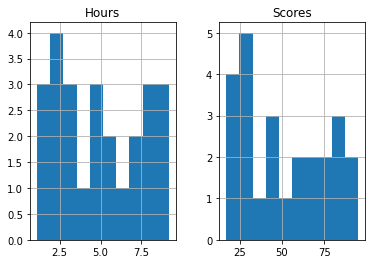

In [7]:
# Lets select these features to explore more.
# we can plot each of these features:
viz = df[['Hours','Scores']]
viz.hist()
plt.show()

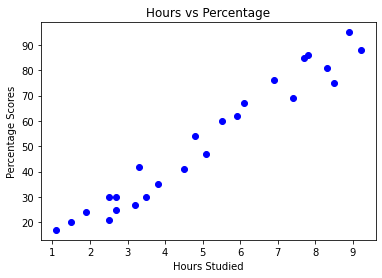

In [8]:
# Now, lets plot each of these Scores vs the Hours, to see how linear is their relation:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients  𝜃=(𝜃1,...,𝜃𝑛)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

### Train data distribution

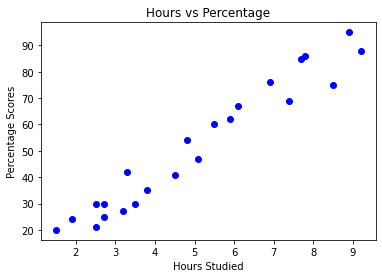

In [10]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

### Modeling

In [11]:
# Using sklearn package to model data.
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.9600148]]
Intercept:  [1.50583846]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'Percentage Scores')

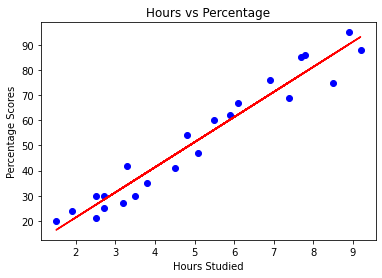

In [12]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_hat = regr.predict(test_x)

In [14]:
print(test_y)

[[81]
 [17]]


In [15]:
own_pred = regr.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = [93.63597537]


### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

In [16]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 3.86
Residual sum of squares (MSE): 15.33
R2-score: 0.99
